In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs
# 1500 tuples of paired latitudes and longitudes

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)
# You can only unzip a zipped tuple once before it is removed from the computer's memory

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

586

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=metric&APPID=2efe2f72d0cfb5dfd382d89849b7724f


In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
 
# Loop through all the cities in the list using enumerate because index in URL will cause error.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | leeton
Processing Record 2 of Set 1 | tiksi
Processing Record 3 of Set 1 | basco
Processing Record 4 of Set 1 | sisimiut
Processing Record 5 of Set 1 | busselton
Processing Record 6 of Set 1 | mount isa
Processing Record 7 of Set 1 | san patricio
Processing Record 8 of Set 1 | qaanaaq
Processing Record 9 of Set 1 | geraldton
Processing Record 10 of Set 1 | ahipara
Processing Record 11 of Set 1 | umzimvubu
City not found. Skipping...
Processing Record 12 of Set 1 | mataura
Processing Record 13 of Set 1 | puttur
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | tommot
Processing Record 16 of Set 1 | tosya
Processing Record 17 of Set 1 | howard springs
Processing Record 18 of Set 1 | hermanus
Processing Record 19 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 20 of Set 1 | saskylakh
Processing Record 21 of Set 1 | hobart
Processing Record 22 of Set 

Processing Record 36 of Set 4 | cairns
Processing Record 37 of Set 4 | alyangula
Processing Record 38 of Set 4 | alofi
Processing Record 39 of Set 4 | torbay
Processing Record 40 of Set 4 | hakui
Processing Record 41 of Set 4 | poum
Processing Record 42 of Set 4 | rosetta
Processing Record 43 of Set 4 | tumannyy
City not found. Skipping...
Processing Record 44 of Set 4 | mbandaka
Processing Record 45 of Set 4 | garowe
Processing Record 46 of Set 4 | lakatoro
Processing Record 47 of Set 4 | yellowknife
Processing Record 48 of Set 4 | zaraza
Processing Record 49 of Set 4 | ribeira grande
Processing Record 50 of Set 4 | pafos
Processing Record 1 of Set 5 | ilulissat
Processing Record 2 of Set 5 | totness
Processing Record 3 of Set 5 | tazovskiy
Processing Record 4 of Set 5 | lugoba
Processing Record 5 of Set 5 | swanton
Processing Record 6 of Set 5 | camana
Processing Record 7 of Set 5 | norfolk
Processing Record 8 of Set 5 | zambezi
Processing Record 9 of Set 5 | parrita
Processing Recor

Processing Record 27 of Set 8 | plettenberg bay
Processing Record 28 of Set 8 | najran
Processing Record 29 of Set 8 | barcelos
Processing Record 30 of Set 8 | la ronge
Processing Record 31 of Set 8 | puerto colombia
Processing Record 32 of Set 8 | gandu
Processing Record 33 of Set 8 | brokopondo
Processing Record 34 of Set 8 | marsa matruh
Processing Record 35 of Set 8 | canakkale
Processing Record 36 of Set 8 | gualeguaychu
Processing Record 37 of Set 8 | whitehorse
Processing Record 38 of Set 8 | sechura
Processing Record 39 of Set 8 | richards bay
Processing Record 40 of Set 8 | palencia
Processing Record 41 of Set 8 | macon
Processing Record 42 of Set 8 | moroni
Processing Record 43 of Set 8 | kranjska gora
Processing Record 44 of Set 8 | turiacu
Processing Record 45 of Set 8 | renqiu
Processing Record 46 of Set 8 | juneau
Processing Record 47 of Set 8 | rudbar
Processing Record 48 of Set 8 | tautira
Processing Record 49 of Set 8 | majholi
Processing Record 50 of Set 8 | puerto es

Processing Record 19 of Set 12 | okandja
City not found. Skipping...
Processing Record 20 of Set 12 | bullhead city
Processing Record 21 of Set 12 | christchurch
Processing Record 22 of Set 12 | broome
Processing Record 23 of Set 12 | guasdualito
Processing Record 24 of Set 12 | aswan
Processing Record 25 of Set 12 | punta alta
Processing Record 26 of Set 12 | jacksonville
Processing Record 27 of Set 12 | zolotinka
City not found. Skipping...
Processing Record 28 of Set 12 | aranos
Processing Record 29 of Set 12 | newton
Processing Record 30 of Set 12 | stevens point
Processing Record 31 of Set 12 | lalomanu
City not found. Skipping...
Processing Record 32 of Set 12 | nagai
Processing Record 33 of Set 12 | carei
Processing Record 34 of Set 12 | nehe
Processing Record 35 of Set 12 | makaryev
Processing Record 36 of Set 12 | yerbogachen
-----------------------------
Data Retrieval Complete      
-----------------------------


In [8]:
len(city_data)

544

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Leeton,-34.5667,146.4000,10.00,93,0,1.81,AU,2021-03-30 17:16:31
1,Tiksi,71.6872,128.8694,-18.20,98,100,3.26,RU,2021-03-30 17:16:32
2,Basco,20.4487,121.9702,26.16,72,0,2.80,PH,2021-03-30 17:16:32
3,Sisimiut,66.9395,-53.6735,-0.14,79,100,6.83,GL,2021-03-30 17:15:19
4,Busselton,-33.6500,115.3333,16.11,93,73,1.98,AU,2021-03-30 17:16:32
5,Mount Isa,-20.7333,139.5000,25.00,29,21,4.12,AU,2021-03-30 17:16:33
6,San Patricio,28.0170,-97.5169,23.89,94,90,7.20,US,2021-03-30 17:14:08
7,Qaanaaq,77.4840,-69.3632,-17.70,71,51,2.40,GL,2021-03-30 17:16:33
8,Geraldton,-28.7667,114.6000,23.00,88,19,3.60,AU,2021-03-30 17:16:33
9,Ahipara,-35.1667,173.1667,18.29,95,48,2.21,NZ,2021-03-30 17:14:24


In [17]:
new_column_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leeton,AU,2021-03-30 17:16:31,-34.5667,146.4000,10.00,93,0,1.81
1,Tiksi,RU,2021-03-30 17:16:32,71.6872,128.8694,-18.20,98,100,3.26
2,Basco,PH,2021-03-30 17:16:32,20.4487,121.9702,26.16,72,0,2.80
3,Sisimiut,GL,2021-03-30 17:15:19,66.9395,-53.6735,-0.14,79,100,6.83
4,Busselton,AU,2021-03-30 17:16:32,-33.6500,115.3333,16.11,93,73,1.98
5,Mount Isa,AU,2021-03-30 17:16:33,-20.7333,139.5000,25.00,29,21,4.12
6,San Patricio,US,2021-03-30 17:14:08,28.0170,-97.5169,23.89,94,90,7.20
7,Qaanaaq,GL,2021-03-30 17:16:33,77.4840,-69.3632,-17.70,71,51,2.40
8,Geraldton,AU,2021-03-30 17:16:33,-28.7667,114.6000,23.00,88,19,3.60
9,Ahipara,NZ,2021-03-30 17:14:24,-35.1667,173.1667,18.29,95,48,2.21


In [18]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [19]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

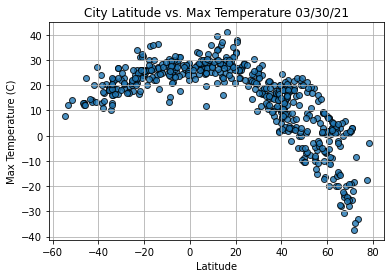

In [30]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

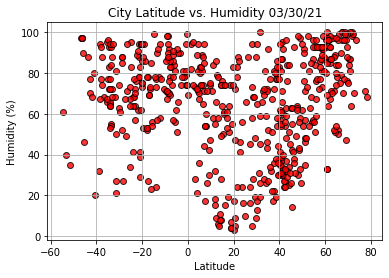

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity, color='red',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

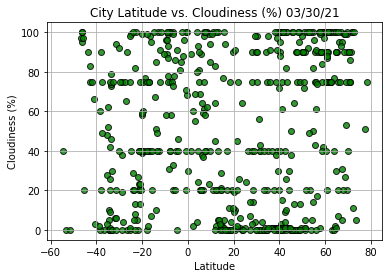

In [34]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness, color ='green',
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

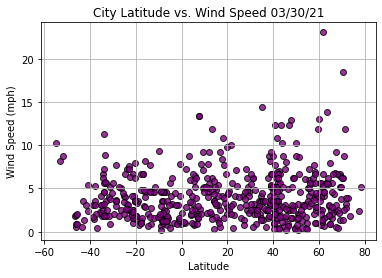

In [37]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed, color=('purple'),
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()